# Importing Necessary Libraries

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [11]:
df=pd.read_csv('/kaggle/input/movies/movies.csv')
df.head(5)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


## we need to have ratings, user id, movie id as features for item item based or user user based collaborative filtering

In [12]:
movies_meta = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv',
                          usecols = ['id','imdb_id','title'])

movies_meta.head(5)

,id,imdb_id,title
0,862,tt0114709,Toy Story
1,8844,tt0113497,Jumanji
2,15602,tt0113228,Grumpier Old Men
3,31357,tt0114885,Waiting to Exhale
4,11862,tt0113041,Father of the Bride Part II


In [13]:
links = pd.read_csv('/kaggle/input/the-movies-dataset/links.csv')

links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
ratings_small = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
ratings_small.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
links  = links.merge(ratings_small, on = 'movieId')

links.head(5)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703
1,1,114709,862.0,9,4.0,938629179
2,1,114709,862.0,13,5.0,1331380058
3,1,114709,862.0,15,2.0,997938310
4,1,114709,862.0,19,3.0,855190091


In [16]:
links.rename(columns = {'tmdbId':'id'}, inplace = True)
movies_meta = movies_meta.drop([29503,35587,19730])
movies_meta['id'] = movies_meta['id'].astype('int64')
movies_meta = movies_meta.merge(links,on='id')

In [17]:
df = movies_meta

df.head(5)

,id,imdb_id,title,movieId,imdbId,userId,rating,timestamp
0,862,tt0114709,Toy Story,1,114709,7,3.0,851866703
1,862,tt0114709,Toy Story,1,114709,9,4.0,938629179
2,862,tt0114709,Toy Story,1,114709,13,5.0,1331380058
3,862,tt0114709,Toy Story,1,114709,15,2.0,997938310
4,862,tt0114709,Toy Story,1,114709,19,3.0,855190091


In [18]:
df = movies_meta[['userId', 'movieId', 'rating', 'title']]

df.head(5)

,userId,movieId,rating,title
0,7,1,3.0,Toy Story
1,9,1,4.0,Toy Story
2,13,1,5.0,Toy Story
3,15,1,2.0,Toy Story
4,19,1,3.0,Toy Story


In [19]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

movie_ratingCount = (df.
                     groupby(by = ['title'])['rating'].
                     count().
                     reset_index().
                     rename(columns = {'rating': 'totalRatingCount'})
                     [['title', 'totalRatingCount']])

movie_ratingCount.head()

,title,totalRatingCount
0,$9.99,3
1,'Neath the Arizona Skies,1
2,"'night, Mother",3
3,(500) Days of Summer,45
4,...And God Created Woman,1


In [20]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')

rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,7,1,3.0,Toy Story,247
1,9,1,4.0,Toy Story,247
2,13,1,5.0,Toy Story,247
3,15,1,2.0,Toy Story,247
4,19,1,3.0,Toy Story,247


In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   8754.000
mean      11.406
std       24.549
min        1.000
25%        1.000
50%        3.000
75%       10.000
max      341.000
Name: totalRatingCount, dtype: float64


## Lets assume that if the popularity count is greater than 50 (more than 50 ratings) its score should be higher and to be recommended

In [22]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,7,1,3.000,Toy Story,247
1,9,1,4.000,Toy Story,247
2,13,1,5.000,Toy Story,247
3,15,1,2.000,Toy Story,247
4,19,1,3.000,Toy Story,247


In [23]:
movie_features_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_features_df.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
28 Days Later,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Beautiful Mind,0.000,0.000,0.000,0.000,4.500,0.000,0.000,3.500,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
A Bug's Life,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
A Christmas Story,0.000,0.000,0.000,5.000,0.000,0.000,0.000,3.500,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
A Clockwork Orange,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.500,3.000,0.000,0.000,0.000,0.000,0.000,3.000


# Collaborative based Recommendation System using KNN

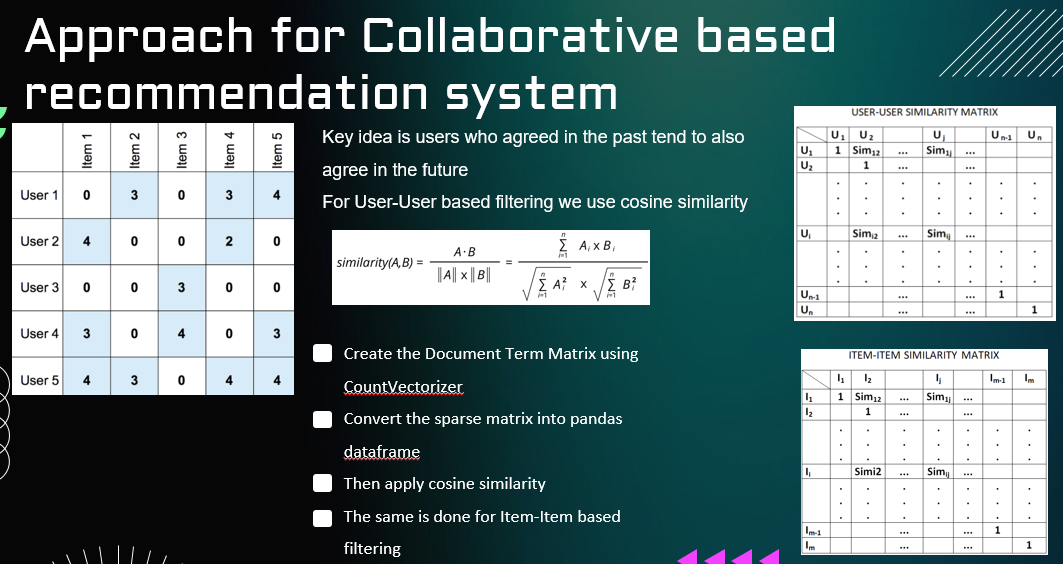

# csr_matrix
If most of the elements of the matrix have 0 value, then it is called a sparse matrix.
Representing a sparse matrix by a 2D array leads to wastage of lots of memory as zeroes in the matrix are of no use in most of the cases. So, instead of storing zeroes with non-zero elements, we only store non-zero elements. This means storing non-zero elements with triples- (Row, Column, value)

In [28]:
from scipy.sparse import csr_matrix

# converting the matrix into array matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)


from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
rating_popular_movie['rating']=rating_popular_movie['rating'].astype('int')
label_encoder= LabelEncoder()
rating_popular_movie['title']=label_encoder.fit_transform(rating_popular_movie['title'])
X,y=rating_popular_movie[['title']],rating_popular_movie['rating']
leaf_size = list(range(1,50))
n_neighbors = list(range(0,10))
p=[1,2,6,10]
#convert to dictionary
knn=KNeighborsClassifier(n_neighbors=10)
nca_pipe=Pipeline([('knn',knn)])
nca_pipe.fit(X,y)
#print(nca_pipe.score(X_test,y_test))
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

In [35]:
from sklearn.metrics import accuracy_score
#Predict testing set
y_pred = best_model.predict(X_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.425394303869284


In [75]:
rating_popular_movie['rating']

0        3
1        4
2        5
3        2
4        3
        ..
99589    3
99590    3
99591    4
99592    4
99829    1
Name: rating, Length: 44061, dtype: int64

In [39]:
print(movie_features_df_matrix)

  (0, 12)	3.5
  (0, 14)	5.0
  (0, 44)	2.5
  (0, 55)	2.0
  (0, 60)	4.0
  (0, 72)	3.5
  (0, 73)	4.0
  (0, 94)	5.0
  (0, 97)	5.0
  (0, 110)	4.5
  (0, 124)	4.5
  (0, 127)	5.0
  (0, 133)	3.0
  (0, 148)	4.0
  (0, 149)	2.5
  (0, 168)	4.0
  (0, 186)	4.0
  (0, 206)	0.5
  (0, 211)	4.0
  (0, 212)	1.0
  (0, 237)	4.0
  (0, 238)	4.0
  (0, 254)	3.0
  (0, 267)	3.5
  (0, 288)	5.0
  :	:
  (465, 433)	4.0
  (465, 451)	4.0
  (465, 467)	3.5
  (465, 471)	4.0
  (465, 481)	5.0
  (465, 504)	3.5
  (465, 508)	4.0
  (465, 517)	3.0
  (465, 518)	4.0
  (465, 519)	3.5
  (465, 521)	4.0
  (465, 527)	4.0
  (465, 528)	4.0
  (465, 536)	4.0
  (465, 546)	5.0
  (465, 552)	4.0
  (465, 560)	4.5
  (465, 563)	5.0
  (465, 568)	1.0
  (465, 574)	4.0
  (465, 584)	5.0
  (465, 597)	3.5
  (465, 602)	5.0
  (465, 623)	3.0
  (465, 653)	4.5


In [40]:
def recommend_movie(movie_name):
    
    distances, indices = model_knn.kneighbors(movie_features_df.loc[movie_name,:].values.reshape(1, -1), n_neighbors = 6)
    
    for i in range(0, len(distances.flatten())):
        if i == 0:
            #print('Recommendations for {0}:\n'.format(movie_features_df.index[indices.flatten()[0]]))
            print('Recommendations for {0}:\n'.format(movie_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

In [41]:
recommend_movie('A Close Shave')

Recommendations for A Close Shave:

1: The Wrong Trousers, with distance of 0.3426323067106505:
2: This Is Spinal Tap, with distance of 0.6055093141588085:
3: Monty Python and the Holy Grail, with distance of 0.6101802075797369:
4: A Fish Called Wanda, with distance of 0.6147928467232779:
5: Life of Brian, with distance of 0.6189618572544828:


In [42]:
recommend_movie('Avatar')

Recommendations for Avatar:

1: Inception, with distance of 0.3663126779224054:
2: Iron Man, with distance of 0.36696298155661766:
3: The Dark Knight, with distance of 0.4246926245558492:
4: District 9, with distance of 0.43666774462351055:
5: Star Trek, with distance of 0.4385474244949342:


# Serialization and Deserialization 

In [43]:
from pickle import dump

import bz2

In [44]:
dump(model_knn, open('knn_model.pkl', 'wb'))

dump(movie_features_df.to_dict(),open('collaborative_cosine_similarity.pkl','wb'))

In [45]:
import numpy as np
from pickle import load

In [46]:
knn_model = load(open('/kaggle/working/knn_model.pkl', 'rb'))

In [47]:
knn_model

NearestNeighbors(algorithm='brute', metric='cosine')

In [48]:
df = load(open('/kaggle/working/collaborative_cosine_similarity.pkl', 'rb'))
df = pd.DataFrame(df)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
28 Days Later,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
